In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [5]:
df=pd.read_csv(r'C:\Users\Zahid\Desktop\Bootcamp\WEEK 7\Country-data.csv')
df.copy()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
df.shape

(167, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

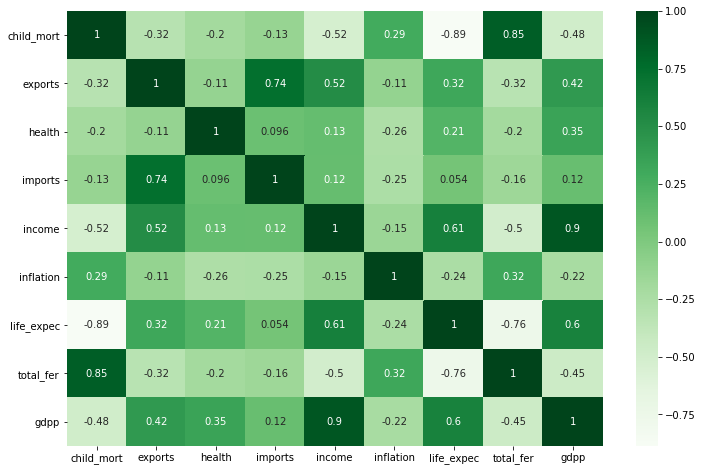

In [15]:
plt.figure(figsize = (12,8))  
sns.heatmap(df.corr(),annot = True, cmap='Greens')
plt.show()

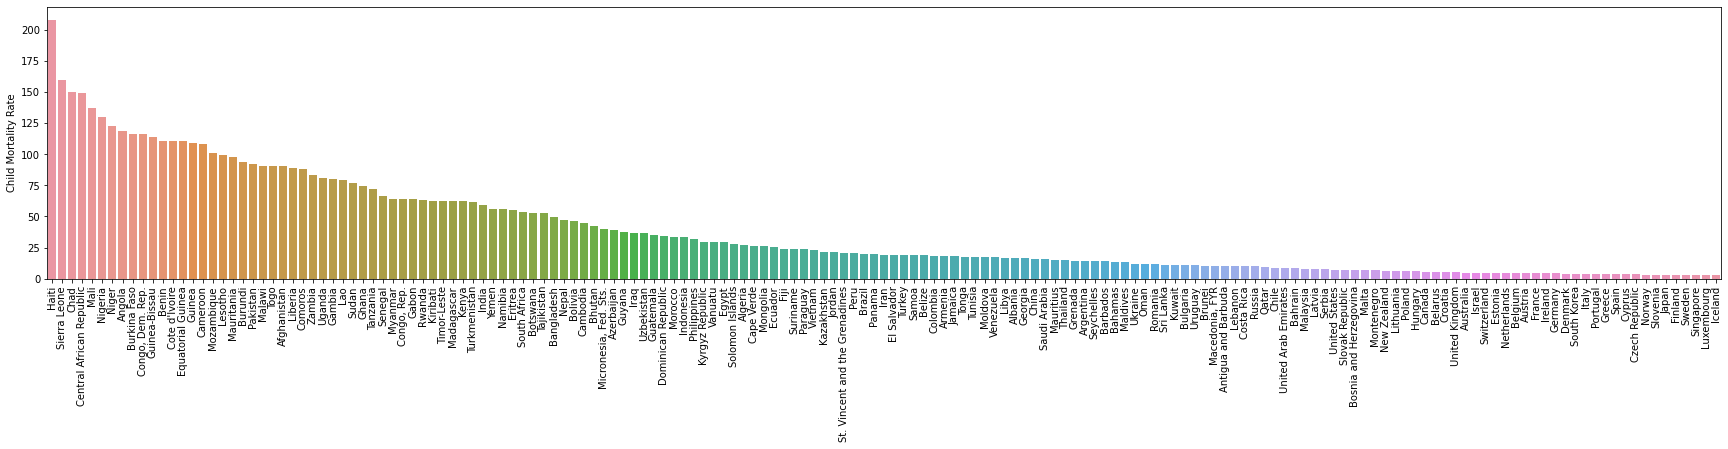

In [10]:
#child mortality

plt.figure(figsize = (30,5))
child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

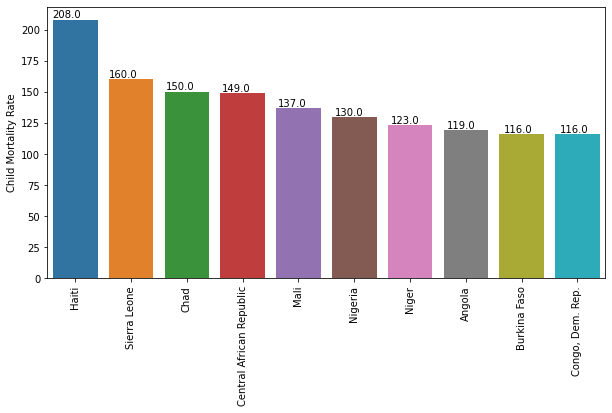

In [12]:
#child_mort_top10
plt.figure(figsize = (10,5))
child_mort_top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

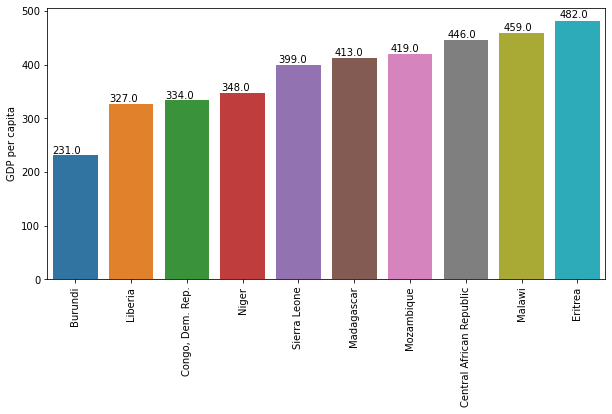

In [13]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

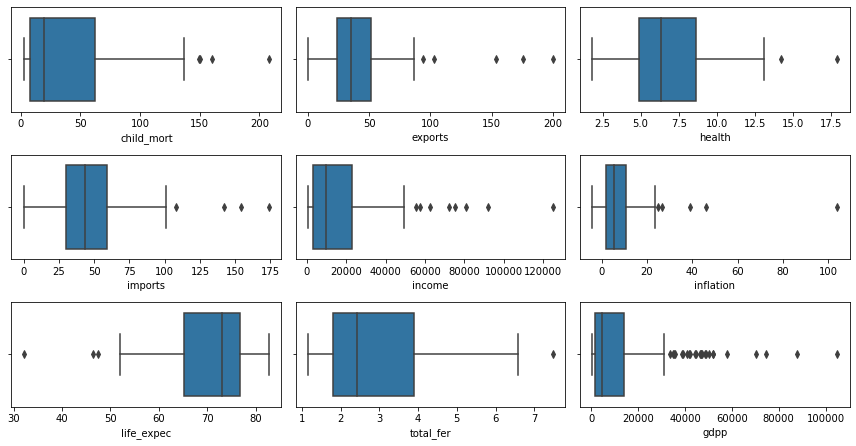

In [16]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df[feature])
    plt.tight_layout()

In [17]:
df_updated = df.iloc[:,:]

def outliers_for_features(df, col):    
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return df_updated[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in ['life_expec','inflation', 'total_fer', 'exports', 'imports', 'health', 'income', 'gdpp']:
    df_updated[col] = outliers_for_features(df, col)

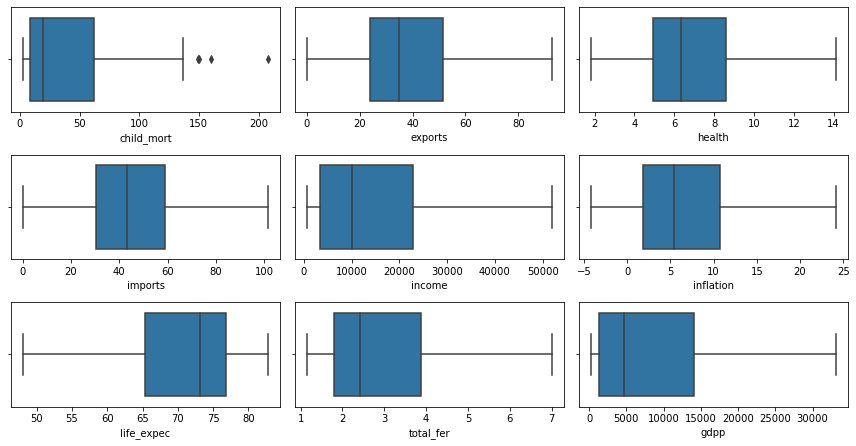

In [18]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df_updated.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df_updated[feature])
    plt.tight_layout()

In [19]:
df_updated

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [20]:
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df_updated.iloc[:, 1:])

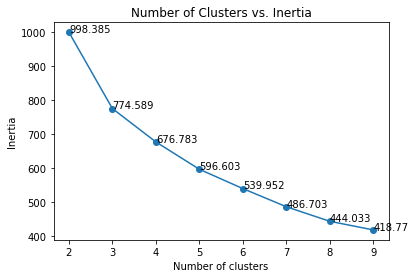

In [21]:
ssd = []
num_of_clusters = list(range(2,10))

for n in num_of_clusters:
    km = KMeans(n_clusters = n, max_iter = 50, random_state=101).fit(df_scaled)
    ssd.append(km.inertia_)
    
plt.plot(num_of_clusters, ssd, marker='o')

for xy in zip(num_of_clusters, ssd):    
    plt.annotate(s = round(xy[1],3), xy = xy,  textcoords='data')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia") # Inertia is within cluster sum of squares
plt.title("Number of Clusters vs. Inertia")
plt.show()

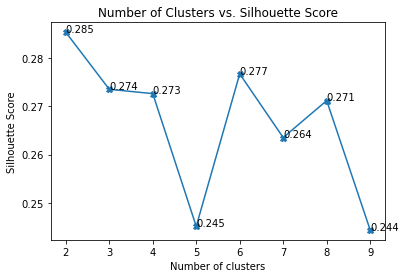

In [22]:
silhouette_value = []
for n in range(2,10):
    km = KMeans(n_clusters = n, random_state=101).fit(df_scaled)
    silhouette_value.append(silhouette_score(df_scaled, km.labels_))
    
plt.plot(num_of_clusters, silhouette_value, marker='X', label=silhouette_value)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")

for xy in zip(num_of_clusters, silhouette_value):    
    plt.annotate(s = round(xy[1],3), xy = xy,  textcoords='data')
    
plt.show()

In [23]:
km = KMeans(n_clusters=3, max_iter=100 , random_state = 101)
km.fit(df_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=101)

In [24]:
print(km.labels_)
print(km.labels_.shape)

[2 1 1 2 1 1 1 0 0 1 0 0 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 0 0 1 1 1 1 2 2 0 1 0 0 2 2 1 0 2 0 1 1 2 2 1 2 0 0 1 1 1 2 0
 0 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 2 2 1 0
 0 2 2 0 0 2 1 1 1 1 1 0 0 1 1 2 1 0 2 1 1 2 0 0 0 1 2 0 0 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]
(167,)


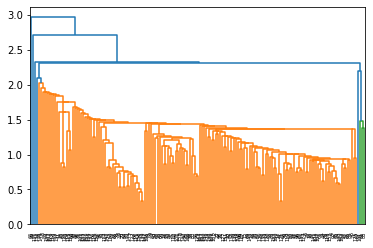

In [25]:
mergings_single = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

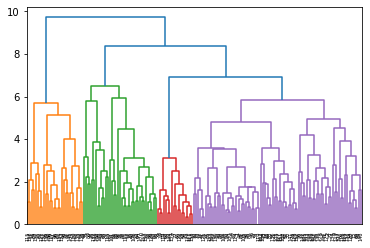

In [26]:
mergings_complete = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [30]:
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
print(cluster_labels)
print(cluster_labels.shape)

[0 1 1 0 1 1 1 1 1 1 1 2 1 1 1 2 1 0 1 1 1 1 1 2 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 2 1 1 1 1 1 2
 1 1 1 1 1 1 0 0 2 1 1 1 1 0 0 2 2 2 1 0 0 2 2 0 2 0 1 0 1 1 1 1 0 1 1 1 2
 1 0 0 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 0 1 2 0 2 2 2 1 1 2 1 1 1 1 1 1 2 1 0
 2 0 0 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 0]
(167,)


In [31]:
df_clustered = df_updated.iloc[:,:]
df_clustered = pd.concat([df_clustered, pd.DataFrame(km.labels_, columns=['cluster_id_km'])], axis = 1)
df_clustered = pd.concat([df_clustered, pd.DataFrame(cluster_labels, columns=['cluster_id_hc'])], axis = 1)
df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1,1


In [33]:
print(df_clustered['cluster_id_km'].value_counts())
print(df_clustered['cluster_id_hc'].value_counts())

1    79
2    47
0    41
Name: cluster_id_km, dtype: int64
1    102
0     37
2     28
Name: cluster_id_hc, dtype: int64


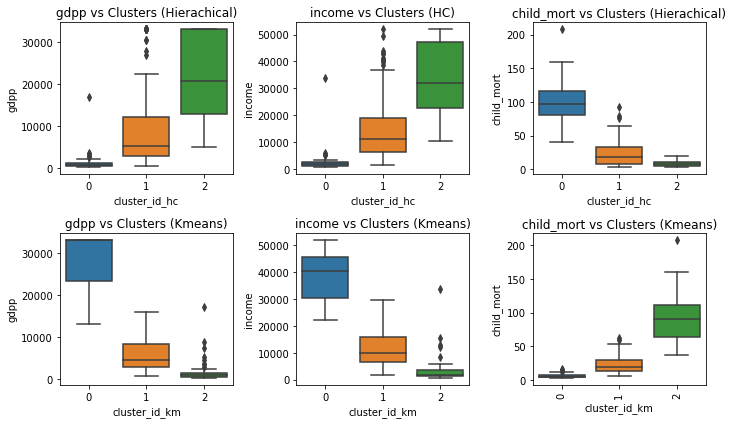

In [34]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs Clusters (Hierachical)")
ax4 = fig.add_subplot(2, 3, 4, title="gdpp vs Clusters (Kmeans)")

ax2 = fig.add_subplot(2, 3, 2, title="income vs Clusters (HC)")
ax5 = fig.add_subplot(2, 3, 5, title="income vs Clusters (Kmeans)")

ax3 = fig.add_subplot(2, 3, 3, title="child_mort vs Clusters (Hierachical)")
ax6 = fig.add_subplot(2, 3, 6, title="child_mort vs Clusters (Kmeans)")

sns.boxplot(df_clustered['cluster_id_hc'],df_clustered['gdpp'],ax=ax1)
sns.boxplot(df_clustered['cluster_id_km'],df_clustered['gdpp'],ax=ax4)

sns.boxplot(df_clustered['cluster_id_hc'],df_clustered['income'],ax=ax2)
sns.boxplot(df_clustered['cluster_id_km'],df_clustered['income'],ax=ax5)

sns.boxplot(df_clustered['cluster_id_hc'],df_clustered['child_mort'],ax=ax3)
sns.boxplot(df_clustered['cluster_id_km'],df_clustered['child_mort'],ax=ax6)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()